In [1]:
import os
import pandas as pd
import numpy as np
from time import time

#from helper import parse_fix_matrix, view_alignment
from Bio import AlignIO, SeqIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from multiprocessing import Pool

import pymol2

import pickle

from sklearn.cluster import KMeans

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
with pymol2.PyMOL() as pymol:
    help(pymol.cmd.load)

Help on function load in module pymol2.cmd2:

load(*a, **k)



In [ ]:
list_structures = os.listdir('data/structures/ranked_0/')
df = pd.read_csv("Needle.csv")


n_structures=len(list_structures)
np_structure_dist = np.zeros((n_structures, n_structures))
dict_structure_dist = {}
t0 = time()
with pymol2.PyMOL() as pymol:
    for rec in list_structures:
        if rec == ".ipynb_checkpoints":
            continue
        pymol.cmd.load(f'data/structures/ranked_0/{rec}', f'{rec}')
    for rec in list_structures:
        if rec == ".ipynb_checkpoints":
            continue
        sel_start = df.loc[df["ID"]==rec.split(".")[0]]["Needle_start"].values 
        sel_end = df.loc[df["ID"]==rec.split(".")[0]]["Needle_stop"].values 
        print(sel_start[0])
        pymol.cmd.select(f'{rec}_sel', f'{rec} resi {sel_start[0]}-{sel_end[0]}')
        
    def rmsd(rec):
        foo = rec[0]
        bar = rec[1]
        aln = pymol.cmd.cealign(foo, bar)
        return (foo, bar, aln["RMSD"])
    list_pairs=[]
    dict_structure_dist={}
    for idx_outer, rec_outer in enumerate(list_structures):
        if rec_outer == ".ipynb_checkpoints":
            continue
        dict_structure_dist[f"{rec_outer}_sel"]={}
        for idx_inner, rec_inner in enumerate(list_structures):
            if rec_inner == ".ipynb_checkpoints":
                continue
            list_pairs.append([f"{rec_outer}_sel", f"{rec_inner}_sel"])

             
    p=Pool(16)
    list_rmsd = p.map(rmsd, list_pairs)

for rec in list_rmsd:
    dict_structure_dist[rec[0]][rec[1]]=rec[2]
t1 = time()
with open("structure_alignment_needle_df.pkl", "wb") as file_writer:
    pickle.dump(dict_structure_dist, file_writer)
print(t1-t0)


[255]
[215]
[252]
[218]
[216]
[236]
[265]
[242]
[216]
[225]
[216]
[256]
[218]
[260]
[256]
[254]
[252]
[269]
[255]
[225]
[255]
[221]
[215]
[246]
[215]
[263]
[225]
[225]
[214]
[206]
[255]
[216]
[240]
[257]
[216]
[234]
[225]
[138]
[216]
[251]
[247]
[16]
[16]
[216]
[261]
[258]
[206]
[225]
[255]
[263]
[265]
[268]
[216]
[216]
[252]
[249]
[246]
[206]
[249]
[224]
[263]
[255]
[377]
[216]
[255]
[251]
[255]
[228]
[254]
[261]
[216]
[245]
[264]
[255]
[254]
[255]
[277]
[225]
[216]
[215]
[240]
[225]
[252]
[254]
[217]
[244]
[225]
[255]
[245]
[224]
[216]
[254]
[250]
[248]
[266]
[263]
[254]
[225]
[240]
[252]
[258]
[217]
[264]
[255]
[264]
[248]
[258]
[255]
[225]
[255]
[252]
[224]
[257]
[265]
[227]
[264]
[264]
[263]
[231]
[263]
[216]
[240]
[225]
[225]
[214]
[216]
[221]
[269]
[216]
[263]
[269]
[268]
[256]
[216]
[252]
[276]
[250]
[217]
[254]
[225]
[236]
[255]
[250]
[222]
[253]
[206]
[259]
[240]
[255]
[246]
[251]
[225]
[230]
[252]
[257]
[206]
[250]
[266]
[215]
[254]
[216]
[262]
[255]
[233]
[225]
[206]
[333]


In [21]:
dict_structure_dist

{'2563232424.pdb_sel': {'2563232424.pdb_sel': 1.2859341859116402e-06,
  '2808082563.pdb_sel': 2.7929673646329998,
  '2837623044.pdb_sel': 2.1434820435472766,
  '2734583469.pdb_sel': 2.2873147355742587,
  '2673085225.pdb_sel': 2.5031307753674765},
 '2808082563.pdb_sel': {'2563232424.pdb_sel': 2.7929673646329998,
  '2808082563.pdb_sel': 1.2794883599280108e-06,
  '2837623044.pdb_sel': 2.6648039653792015,
  '2734583469.pdb_sel': 3.0682778366990298,
  '2673085225.pdb_sel': 1.812411733649873},
 '2837623044.pdb_sel': {'2563232424.pdb_sel': 2.1434820435471935,
  '2808082563.pdb_sel': 2.664803965379282,
  '2837623044.pdb_sel': 1.4007340882006178e-06,
  '2734583469.pdb_sel': 1.4692152217453245,
  '2673085225.pdb_sel': 3.9206714011895105},
 '2734583469.pdb_sel': {'2563232424.pdb_sel': 2.2873147355742587,
  '2808082563.pdb_sel': 3.068277744004343,
  '2837623044.pdb_sel': 1.469215221745388,
  '2734583469.pdb_sel': 1.450479699381587e-06,
  '2673085225.pdb_sel': 2.4418489644609647},
 '2673085225.pdb_

In [3]:
# Load structure_alignment_df

with open("structure_alignment_df.pkl", "rb") as f:
    dict_structure_dist = pickle.load(f)
    

with open("seq_dist.pkl", "rb") as file_writer: 
    seq_dict = pickle.load(file_writer)


    


In [4]:
kmeans_seq = KMeans(n_clusters=3, random_state=0).fit(seq_dict["vec"])

print(len(kmeans_seq.labels_))

seq_id_label_map = {_id.split("_")[0]:label for _id, label in zip(seq_dict["id"], kmeans_seq.labels_)}


260
260


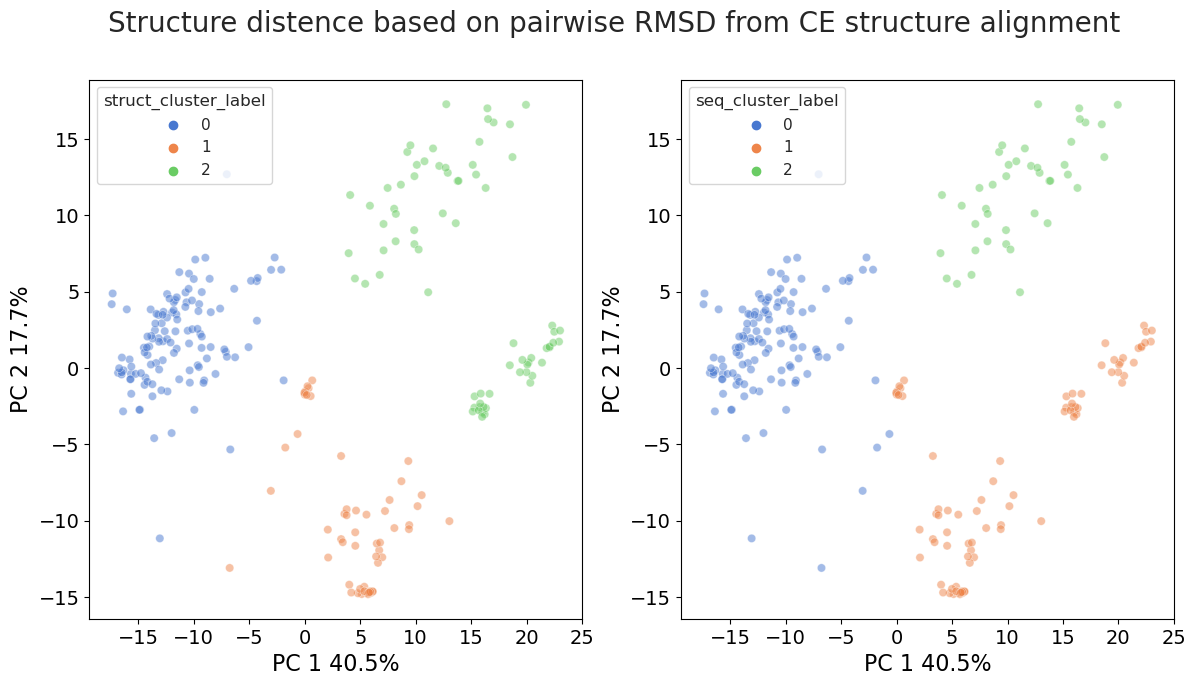

In [7]:
arr = np.zeros((256,256))
arr_1 = np.zeros((256,))
struct_dict={"id":[], "dist":[]}
for idx_out, rec_outer in enumerate(dict_structure_dist.items()):
    arr_1=np.zeros((256,))
    for idx_in, rec_inner in enumerate(rec_outer[1].items()):
        arr[idx_out, idx_in] = rec_inner[1]
        arr_1[idx_in] = rec_inner[1]
    struct_dict["id"].append(rec_outer[0])
    struct_dict["dist"].append(arr_1)
kmeans = KMeans(n_clusters=3, random_state=5).fit(arr)
struct_cluster_label = kmeans.labels_ 

pca = PCA(n_components=2)
X_embedded_pca = pca.fit_transform(arr)
list_explaned_varience = [ round(i, 3) for i in  pca.fit(arr).explained_variance_ratio_]

arr_label_maped_seq_struct = []
for rec in struct_dict["id"]:
    try:
        arr_label_maped_seq_struct.append(seq_id_label_map[rec.split(".")[0].split("_")[0]])
    except:
        arr_label_maped_seq_struct.append(3)
        print(rec)
#arr_label_maped_seq_struct = [ seq_id_label_map[_id.split("_")[0]] for _id in struct_dict["id"]]
struct_dict["seq_cluster_label"] = arr_label_maped_seq_struct
struct_dict["struct_cluster_label"] = struct_cluster_label
struct_dict = pd.DataFrame(struct_dict)

def pc_split(vec):
    pcs = pca.transform([vec])
    return pcs[0,0], pcs[0,1]

struct_dict[f"PC 1 {list_explaned_varience[0]*100}%"], struct_dict[f"PC 2 {list_explaned_varience[1]*100}%"] = zip(*struct_dict["dist"].map(pc_split))

f, ax = plt.subplots(1,2,figsize=[14,7])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict, x=f"PC 1 {list_explaned_varience[0]*100}%", y=f"PC 2 {list_explaned_varience[1]*100}%", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax[0], hue="struct_cluster_label")
#ax[0].set_title("Structure distence based on pairwise RMSD from CE structure alignment")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict, x=f"PC 1 {list_explaned_varience[0]*100}%", y=f"PC 2 {list_explaned_varience[1]*100}%", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax[1], hue="seq_cluster_label")
#ax[1].set_title("Structure distence based on pairwise RMSD from CE structure alignment")
f.suptitle("Structure distence based on pairwise RMSD from CE structure alignment")
f.savefig("struct_dist_rmsd.png")
plt.show()

/home/sandra/anaconda3/envs/protein_metrics/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


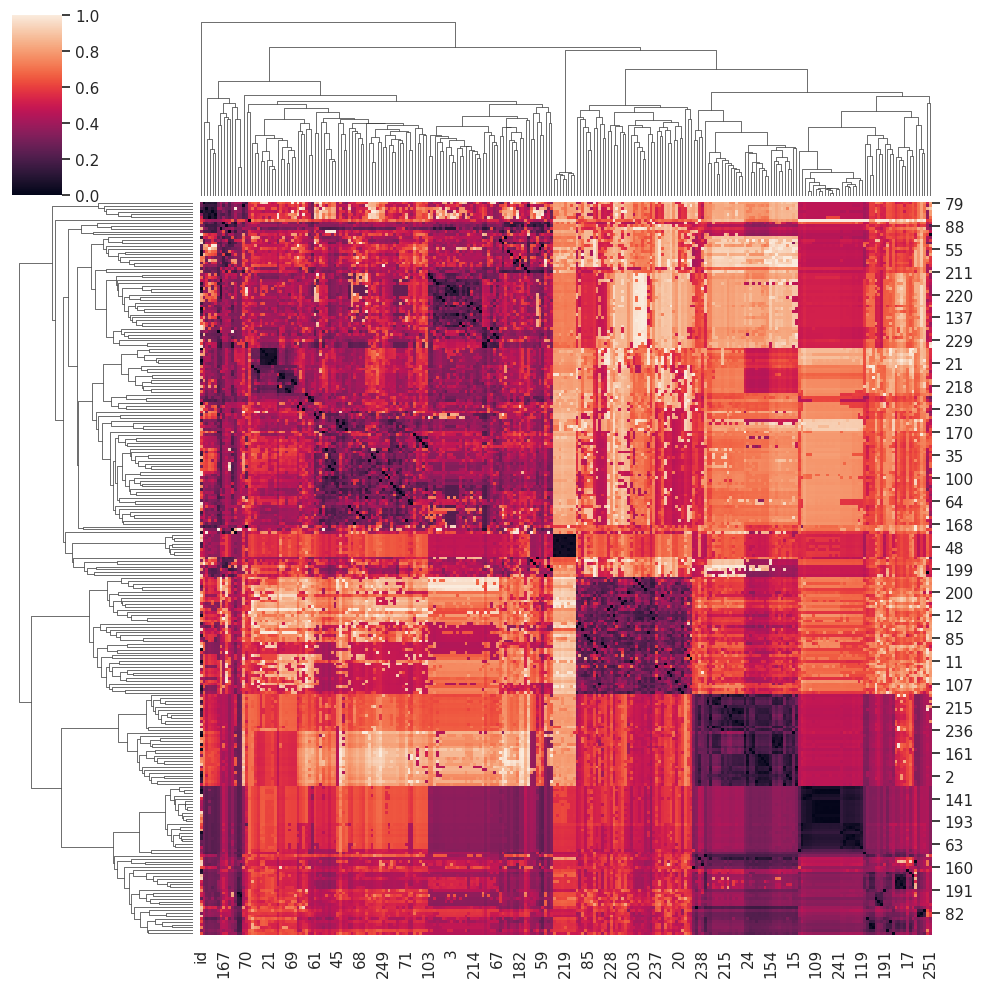

In [8]:
df = struct_dict[["id", "dist"]]
df_2 =  pd.DataFrame(df['dist'].to_list(), columns=df.index.values.tolist())
df_2["id"]=df.index.values.tolist()
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df_2, standard_scale=1)
#plt.show()
# Normalize
#sns.clustermap(df, z_score=1)
#plt.show()

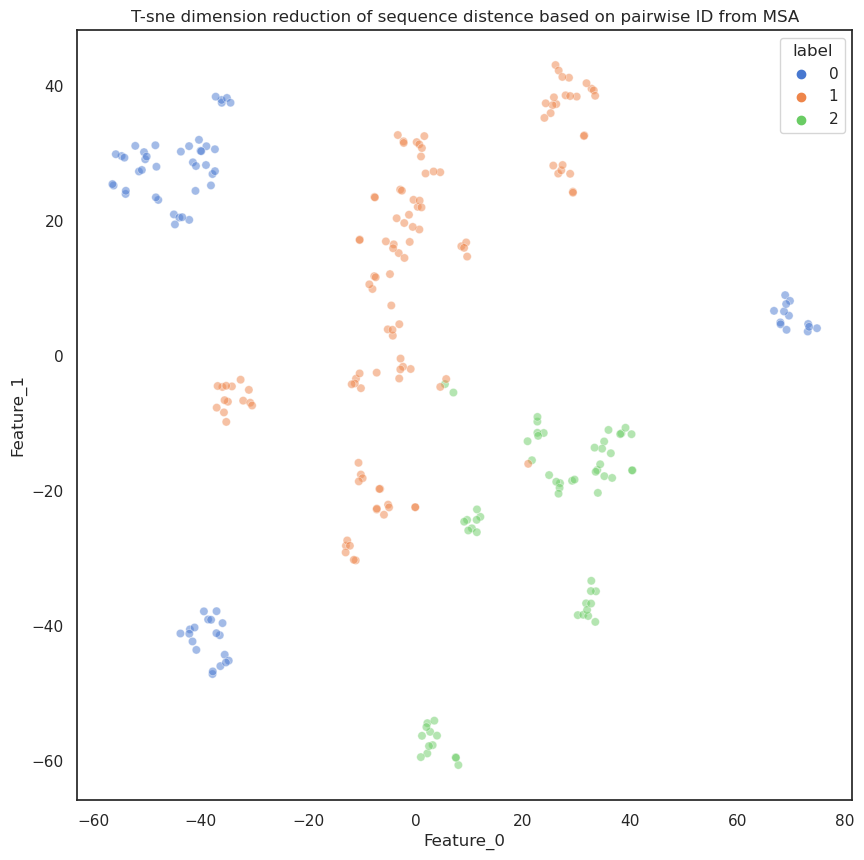

In [9]:
X_embedded_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=5).fit_transform(arr)
kmeans = KMeans(n_clusters=3, random_state=0).fit(arr)

# make_dict

data_t_sne = {"Feature_0":[], "Feature_1":[]}
for x in X_embedded_tsne:
    data_t_sne["Feature_0"].append(x[0])
    data_t_sne["Feature_1"].append(x[1])

data_t_sne["label"]=kmeans.labels_
f, ax = plt.subplots(figsize=[10,10])

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=data_t_sne, x="Feature_0", y="Feature_1", #hue="origin", size="weight",
            alpha=.5, palette="muted", ax=ax, hue="label")
ax.set_title("T-sne dimension reduction of sequence distence based on pairwise ID from MSA")
plt.show()